### Pima indian Diabetes Dataset

### Tf.estimator API

### Categorical and Continious Features

### LinearClassifier and DNNClassifier

### Let's get started

In [33]:
import pandas as pd


In [34]:
diabetes =pd.read_csv('pima-indians-diabetes.csv')

In [35]:
diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [36]:
diabetes.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [37]:
cols_to_norm=['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1']

In [38]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [39]:
diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0


In [40]:
import tensorflow as tf

In [41]:
diabetes.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [42]:
num_preg=tf.feature_column.numeric_column('6')
plasma_gluc=tf.feature_column.numeric_column('148')
dias_press=tf.feature_column.numeric_column('72')
tricep=tf.feature_column.numeric_column('35')
insulin=tf.feature_column.numeric_column('0')
bmi=tf.feature_column.numeric_column('33.6')
diabetes_pedigee=tf.feature_column.numeric_column('0.627')
age=tf.feature_column.numeric_column('50')

In [43]:
assigned_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

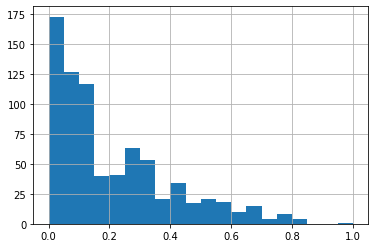

In [46]:
diabetes['50'].hist(bins=20)

In [47]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [49]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigee,
           assigned_group,age_bucket]

In [ ]:
#Train the split

In [61]:
x_data=diabetes.drop('1',axis=1)

In [62]:
x_data.head()

,6,148,72,35,0,33.6,0.627,50
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000


In [63]:
labels=diabetes['1']

In [67]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_eval,y_train,y_eval=train_test_split(x_data,labels
                            test_size=0.3,random_state=101)

SyntaxError: invalid syntax (<ipython-input-70-2be7c05335b0>, line 2)

In [55]:
#Labels

In [64]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,
                                                 num_epochs=1000,
                                                  shuffle=True)

NameError: name 'X_train' is not defined

In [65]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\satya\\AppData\\Local\\Temp\\tmpsper19_e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B9489759C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [66]:
model.train(input_fn=input_func,steps=1000)

NameError: name 'input_func' is not defined

In [21]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=Y_test,
                                                   batch_size=10,num_epochs=1,
                                                   shuffle=False)

NameError: name 'X_test' is not defined

In [22]:
result=model.evaluate(eval_input_func)

NameError: name 'model' is not defined

In [23]:
result

NameError: name 'result' is not defined

In [24]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                   batch_size=10,num_epochs=1,
                                                   shuffle=False)

NameError: name 'X_test' is not defined

In [25]:
predictions=model.predict(pred_input_func)

NameError: name 'model' is not defined

In [26]:
my_pred=list(predictions)

NameError: name 'predictions' is not defined

In [ ]:
my_pred

In [ ]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,
                                    n_classes=2)

In [27]:
dnn_model.train(input_fn=input_func,steps=1000)

NameError: name 'dnn_model' is not defined

In [ ]:
embedded_group_col=tf.feature_column.embedding_column(assigned_group,dimension=4)

In [28]:
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,
           assigned_group,age_bucket]

NameError: name 'diabetes_pedigree' is not defined

In [29]:
input_func=tf.estimator.inputs.pandas_input_fn(x_train,batch_size=10,num_epochs=1000,shuffle=True)

NameError: name 'x_train' is not defined

In [ ]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

In [ ]:
dnn_model.train(input_fn=input_func,steps=1000)

In [ ]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=Y_test,batch_size=10,
                                                   num_epochs=1,shuffle=False)

In [ ]:
dnn_model.evaluate(eval_input_func)